<a href="https://colab.research.google.com/github/rajashekar028/RossmannSalesPrediction/blob/main/Copy_of_Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

# This is a project made by rajashekar alone

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
rossmann_df = pd.read_csv('/content/drive/MyDrive/Rossmann Stores Data.csv')
store_df = pd.read_csv('/content/drive/MyDrive/store.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
rossmann_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
rossmann_df.shape

(1017209, 9)

In [ ]:
store_df.shape

(1115, 10)

In [ ]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
## code for replacing Nan values with mode.

store_new = store_df.copy()
store_new['CompetitionDistance'] = store_new['CompetitionDistance'].fillna(0)
store_new['CompetitionOpenSinceMonth'] = store_new['CompetitionOpenSinceMonth'].fillna(0)
competition_year_mode = store_new['CompetitionOpenSinceYear'].mode().iloc[0]
store_new['CompetitionOpenSinceYear'] = store_new['CompetitionOpenSinceYear'].fillna(competition_year_mode)


store_new['Promo2SinceWeek'] = store_new['Promo2SinceWeek'].fillna(0)
promo2year_mode = store_new['Promo2SinceYear'].mode().iloc[0]
store_new['Promo2SinceYear'] = store_new['Promo2SinceYear'].fillna(promo2year_mode)
promo_interval_mode = store_new['PromoInterval'].mode().iloc[0]
store_new['PromoInterval'] = store_new['PromoInterval'].fillna(promo_interval_mode)
store_new.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [ ]:
final1 = pd.merge(rossmann_df, store_new, on='Store', how='left')
final1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct"
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct"
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct"


In [ ]:
final1.shape

(1017209, 18)

In [ ]:
final1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [ ]:
# code for changing StateHoliday dtype from object to int.
final1.loc[final1['StateHoliday'] == '0', 'StateHoliday'] = 0
final1.loc[final1['StateHoliday'] == 'a', 'StateHoliday'] = 1
final1.loc[final1['StateHoliday'] == 'b', 'StateHoliday'] = 2
final1.loc[final1['StateHoliday'] == 'c', 'StateHoliday'] = 3
final1['StateHoliday'] = final1['StateHoliday'].astype(int, copy=False)

print('levels :', final1['StateHoliday'].unique(), '; data type :', final1['StateHoliday'].dtype)

# code for changing Assortment dtype from object to int.
final1.loc[final1['Assortment'] == 'a', 'Assortment'] = 0
final1.loc[final1['Assortment'] == 'b', 'Assortment'] = 1
final1.loc[final1['Assortment'] == 'c', 'Assortment'] = 2
final1['Assortment'] = final1['Assortment'].astype(int, copy=False)

print('levels :', final1['Assortment'].unique(), '; data type :', final1['Assortment'].dtype)

# code for changing StoreType dtype from object to int.
final1.loc[final1['StoreType'] == 'a', 'StoreType'] = 0
final1.loc[final1['StoreType'] == 'b', 'StoreType'] = 1
final1.loc[final1['StoreType'] == 'c', 'StoreType'] = 2
final1.loc[final1['StoreType'] == 'd', 'StoreType'] = 3
final1['StoreType'] = final1['StoreType'].astype(int, copy=False)

print('levels :', final1['StoreType'].unique(), '; data type :', final1['StoreType'].dtype)

levels : [0 1 2 3] ; data type : int64
levels : [0 2 1] ; data type : int64
levels : [2 0 3 1] ; data type : int64


In [ ]:
# code for changing format of date from object to datetime
final1['Date'] = pd.to_datetime(final1['Date'], format= '%Y-%m-%d')

final1['CompetitionOpenSinceYear']= final1['CompetitionOpenSinceYear'].astype(int)
final1['Promo2SinceYear']= final1['Promo2SinceYear'].astype(int)

final1['CompetitionOpenSinceMonth'] = pd.DatetimeIndex(final1['Date']).month



In [ ]:
final1['CompetitionDistance']= final1['CompetitionDistance'].astype(int)
final1['Promo2SinceWeek']= final1['Promo2SinceWeek'].astype(int)

In [ ]:
final1.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                          int64
SchoolHoliday                         int64
StoreType                             int64
Assortment                            int64
CompetitionDistance                   int64
CompetitionOpenSinceMonth             int64
CompetitionOpenSinceYear              int64
Promo2                                int64
Promo2SinceWeek                       int64
Promo2SinceYear                       int64
PromoInterval                        object
dtype: object

In [ ]:
final1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270,7,2008,0,0,2011,"Jan,Apr,Jul,Oct"
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570,7,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130,7,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620,7,2009,0,0,2011,"Jan,Apr,Jul,Oct"
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910,7,2015,0,0,2011,"Jan,Apr,Jul,Oct"


# Data Analysis

In [ ]:
corr = final1.corr()

Text(0.5, 1.0, 'Correlation Heatmap')

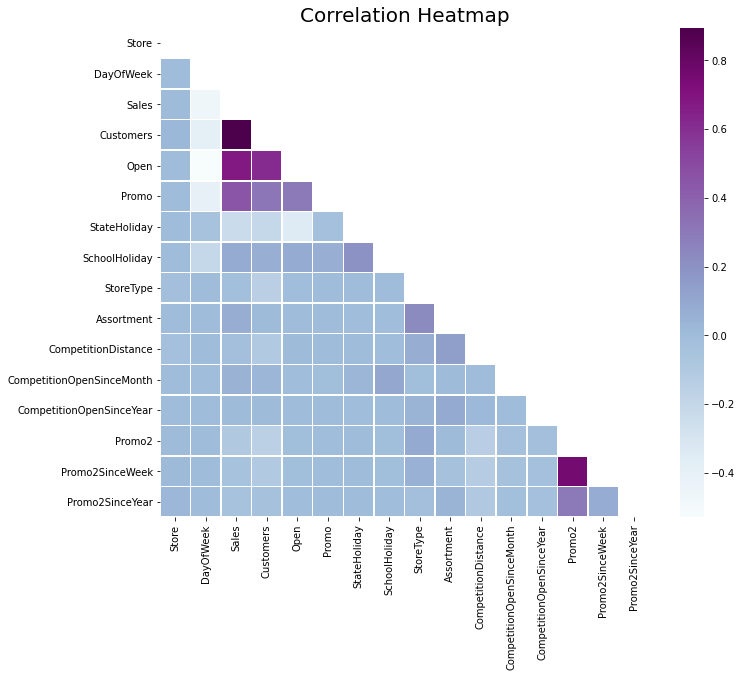

In [ ]:
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (11, 9))
sns.heatmap(corr, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")
plt.title("Correlation Heatmap", fontsize=20)

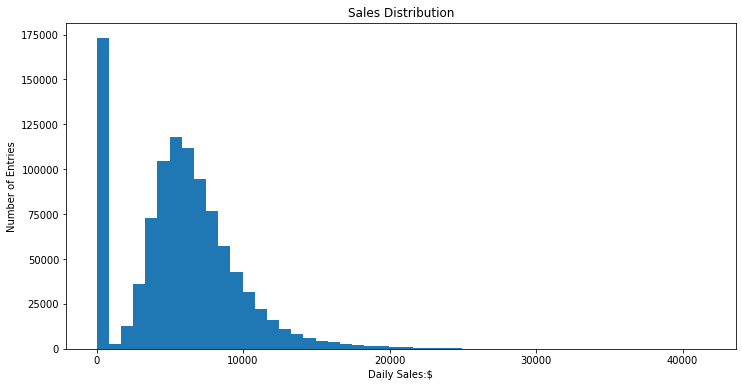

In [ ]:
plt.figure(figsize=(12, 6))
plt.xlabel('Daily Sales:$')
plt.ylabel('Number of Entries')
plt.title('Sales Distribution')
plt.hist(x=final1.Sales,bins=50);

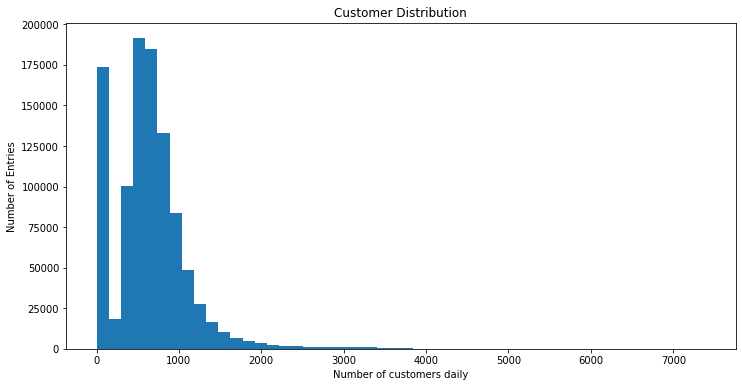

In [ ]:
plt.figure(figsize=(12, 6))
plt.xlabel('Number of customers daily')
plt.ylabel('Number of Entries')
plt.title('Customer Distribution')
plt.hist(x=final1.Customers,bins=50);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


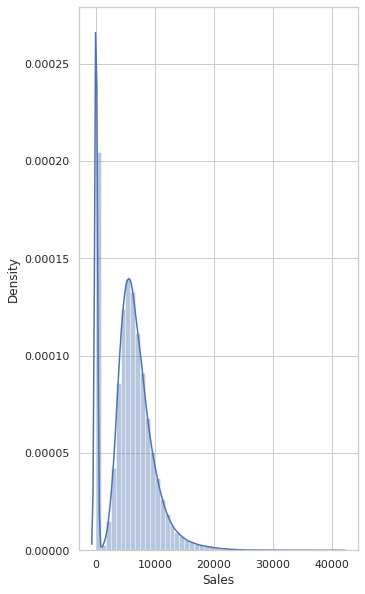

In [ ]:
plt.figure(figsize=(5,10))
sns.set(style="whitegrid")
sns.distplot(final1["Sales"])

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

Text(0, 0.5, 'Sales')

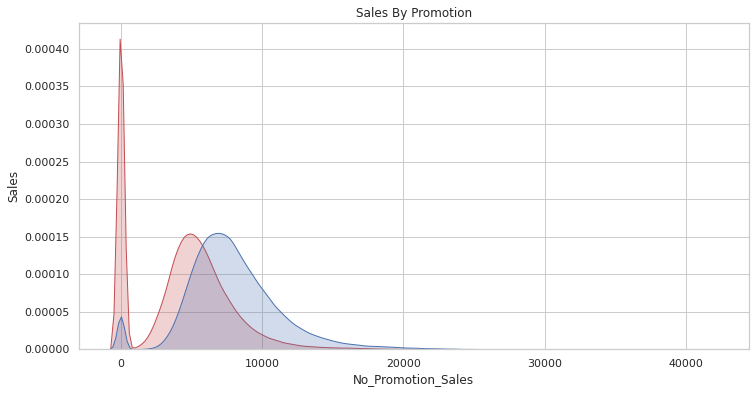

In [ ]:
promo0 = final1.query('Promo==0')
promo0 = promo0.rename(columns={'Sales':'No_Promotion_Sales'})
promo1 = final1.query('Promo==1')
promo1 = promo1.rename(columns={'Sales':'Promotion_Sales'})
x1 = promo0.No_Promotion_Sales
x2 = promo1.Promotion_Sales

plt.figure(figsize=(12,6))
ax = sns.kdeplot(x1, shade=True, color="r")
ax = sns.kdeplot(x2, shade=True, color="b")
plt.title("Sales By Promotion")
plt.ylabel('Sales')



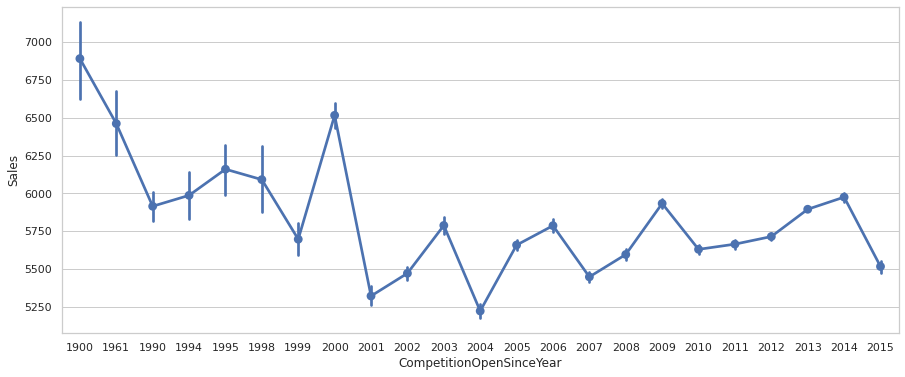

In [ ]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceYear', y= 'Sales', data=final1)


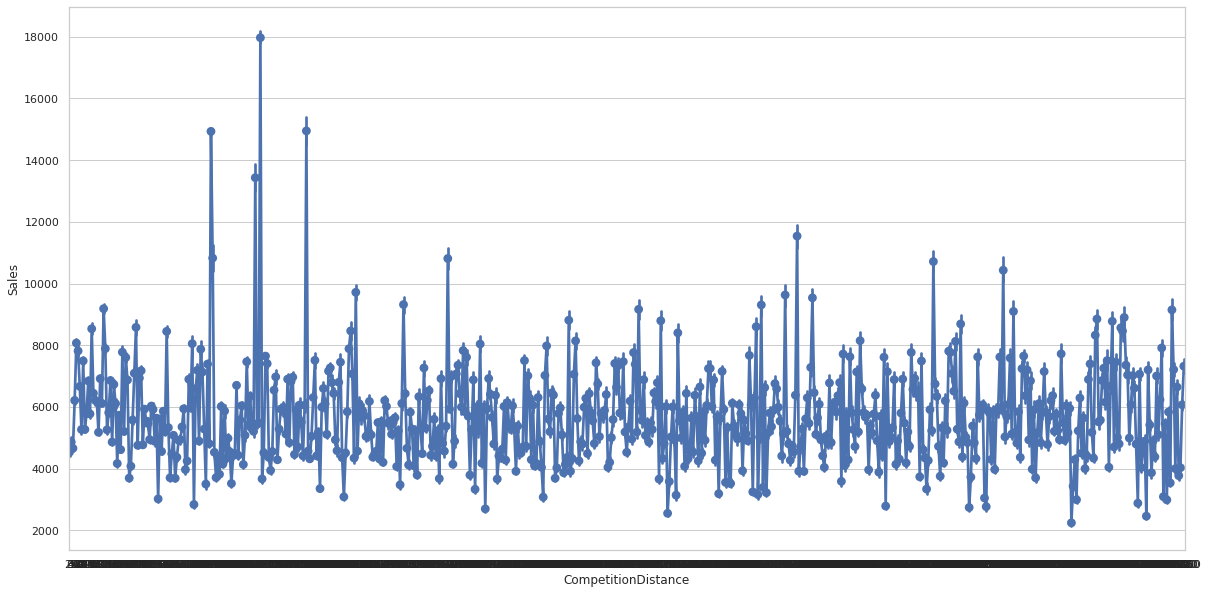

In [ ]:
plt.figure(figsize=(20,10))
sns.pointplot(x= "CompetitionDistance", y= "Sales", data=final1)

In [ ]:
new_df = final1[final1.Sales != 0 ]
new_df.shape

(844338, 18)

In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2, mean_squared_error as mse

In [ ]:
# defining dependent variable
dependent_variables = 'Sales'

# defining independent variable
independent_variables = list(new_df.columns.drop(['CompetitionOpenSinceYear', 'Promo2SinceYear','PromoInterval','Date','Sales']))

In [ ]:
independent_variables

['Store',
 'DayOfWeek',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'Promo2',
 'Promo2SinceWeek']

In [ ]:
# Create the data of independent variables
X = new_df[independent_variables].values

# Create the data of dependent variable
y = new_df[dependent_variables].values

In [ ]:
new_df[independent_variables]

,Store,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,Promo2,Promo2SinceWeek
0,1,5,555,1,1,0,1,2,0,1270,7,0,0
1,2,5,625,1,1,0,1,0,0,570,7,1,13
2,3,5,821,1,1,0,1,0,0,14130,7,1,14
3,4,5,1498,1,1,0,1,2,2,620,7,0,0
4,5,5,559,1,1,0,1,0,0,29910,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,566,1,0,1,1,1,0,150,1,0,0
1016827,733,2,2377,1,0,1,1,1,1,860,1,0,0
1016863,769,2,1248,1,0,1,1,1,1,840,1,1,48
1017042,948,2,1039,1,0,1,1,1,1,1430,1,0,0


In [ ]:
new_df[dependent_variables]

0           5263
1           6064
2           8314
3          13995
4           4822
           ...  
1016776     3375
1016827    10765
1016863     5035
1017042     4491
1017190     5961
Name: Sales, Length: 844338, dtype: int64

In [ ]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(675470, 13)
(168868, 13)


In [ ]:
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)

0.7625985611864317

In [ ]:
reg.coef_

array([-1.61983798e-01, -6.68975384e+01,  6.37449294e+00,  2.62900812e-13,
        1.29063147e+03, -1.30130435e+03,  3.88913634e+01,  2.73886353e+02,
        2.07308013e+02,  2.91764025e-02,  2.90161259e+01, -4.01812568e+01,
        1.19532302e+01])

In [ ]:
reg.intercept_

868.1092850789673

In [ ]:
y_pred = reg.predict(X_test)
y_pred

array([6056.75476086, 9428.11269094, 8445.67585256, ..., 2476.06017074,
       4359.93148102, 4432.02483244])

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 2330558.0093107014
RMSE : 1526.6165233321371


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)

R2 : 0.7587999587109353


# lasso

In [ ]:
L1 = Lasso(alpha = 0.7)
L1.fit(X_train, y_train)

Lasso(alpha=0.7, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
y_pred = L1.predict(X_test)

In [ ]:
L1.score(X_test, y_test)

0.7587762888121758

In [ ]:
pd.DataFrame(zip(y_test, y_pred), columns = ['actual', 'pred'])

,actual,pred
0,6792,6056.056273
1,11585,9432.428779
2,11843,8442.429871
3,11961,10375.020800
4,4657,5023.113459
...,...,...
168863,9680,8462.759072
168864,4252,3492.932433
168865,2581,2477.096276
168866,3757,4363.761093


RIDGE

In [ ]:
L2 = Ridge(alpha = 0.5)

In [ ]:
L2.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
L2.predict(X_test)

array([6056.75467408, 9428.10989795, 8445.67293728, ..., 2476.06174677,
       4359.93246233, 4432.02797997])

In [ ]:
L2.score(X_test, y_test)

0.758799960276613